In [ ]:
# (auto-reload changes from imported libraries)

%load_ext autoreload
%autoreload 2

In [2]:
import pm4py

from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.algo.filtering.dfg.dfg_filtering import clean_dfg_based_on_noise_thresh

# viz
# (wvw: updated, courtesy https://stackoverflow.com/questions/75424412/no-module-named-pm4py-objects-petri-in-pm4py)
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
# (wvw: added)
from pm4py.visualization.dfg import visualizer as dfg_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer

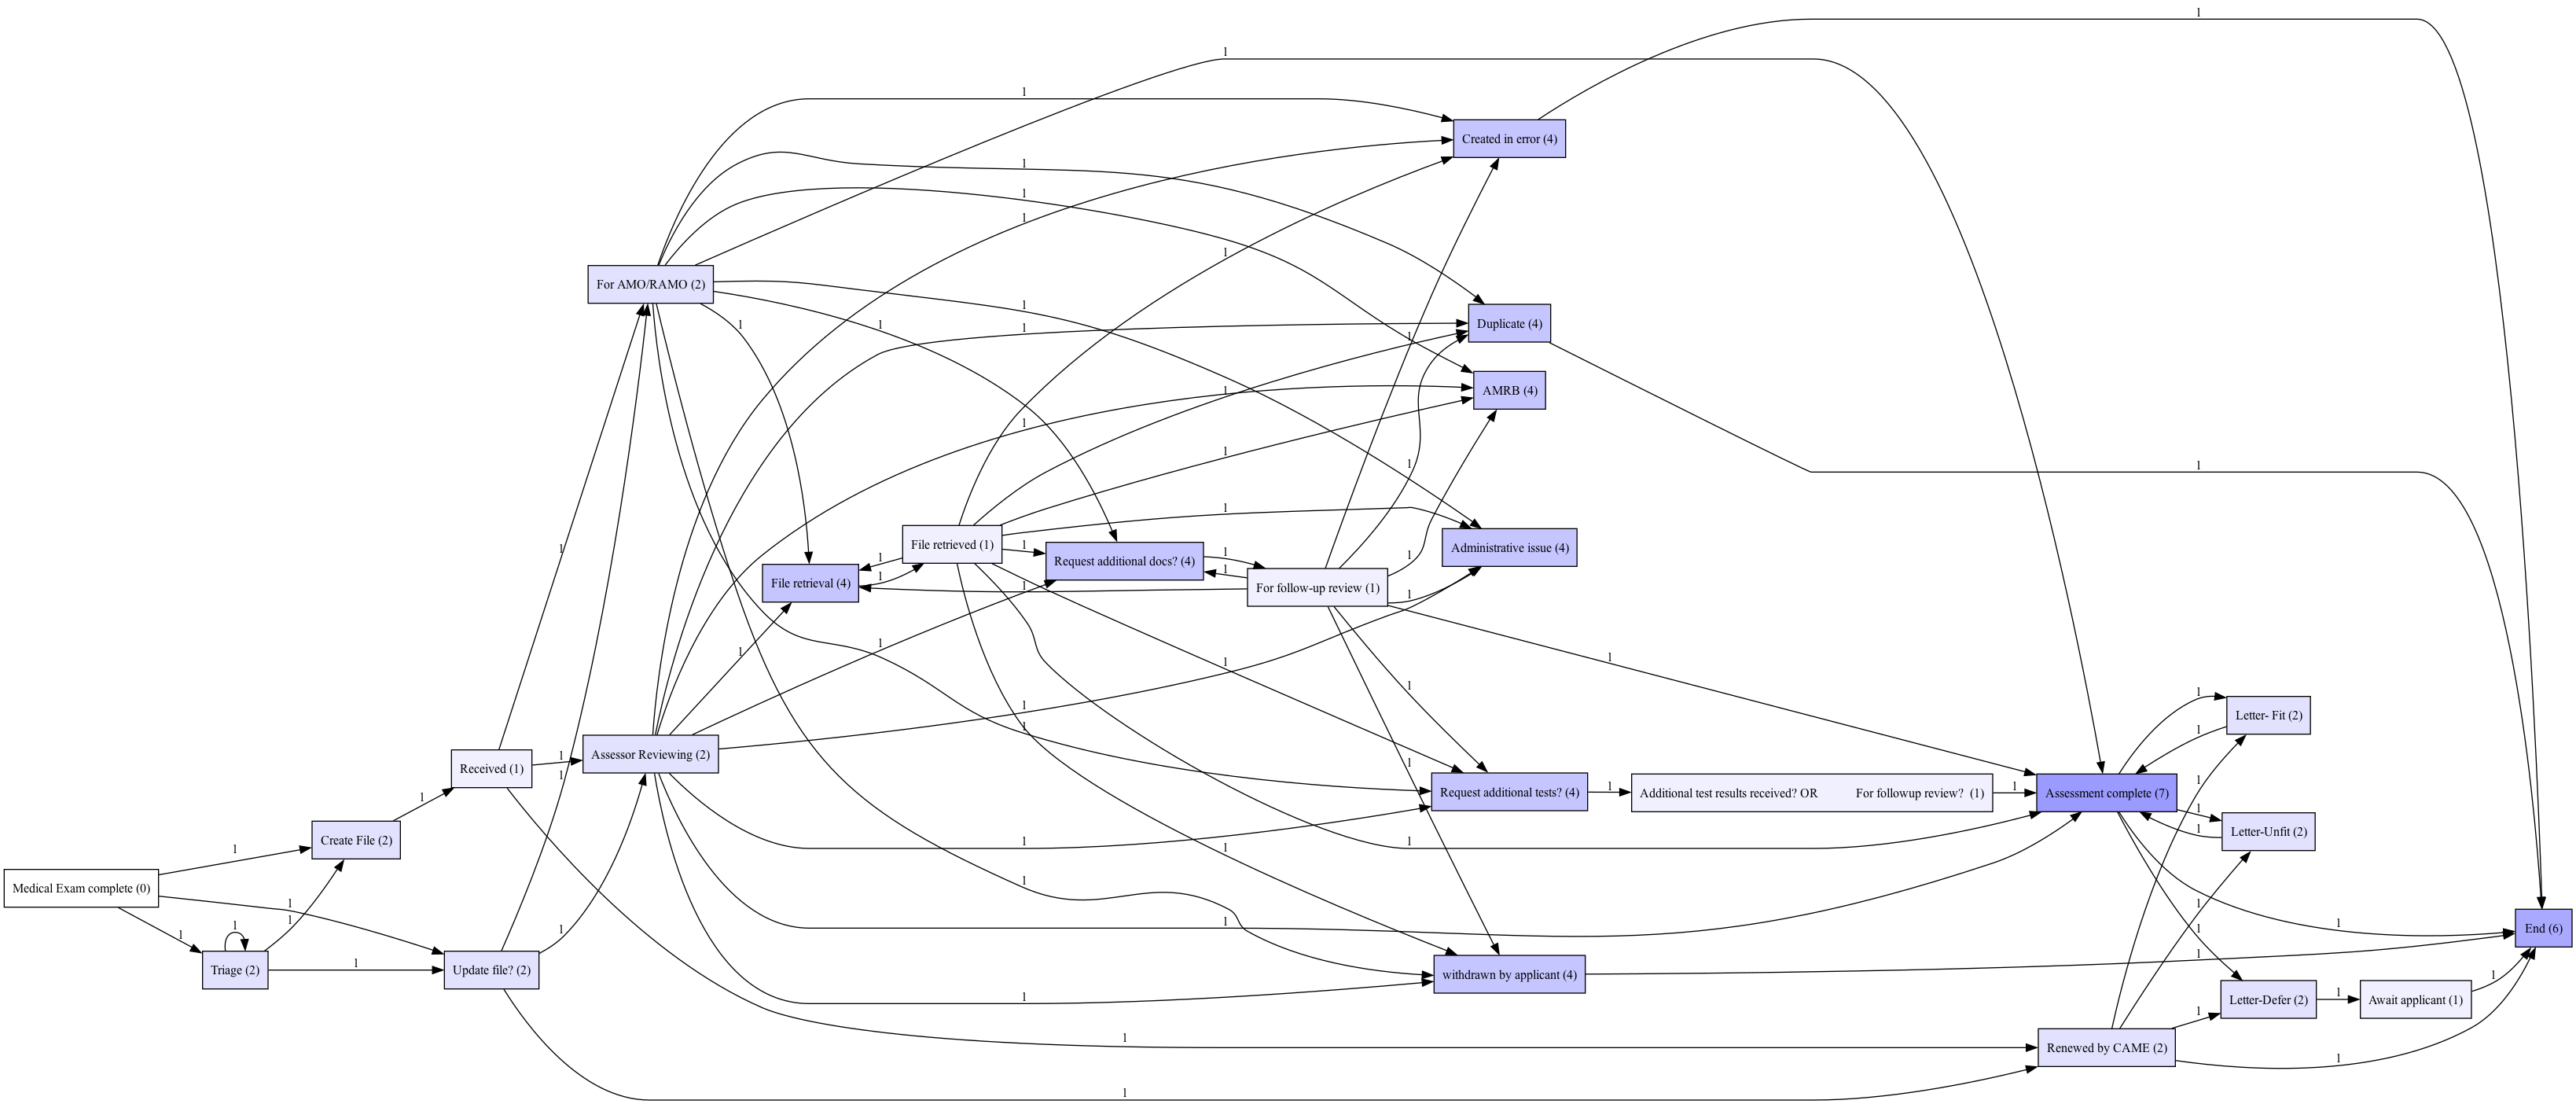

In [3]:
# normative process model

dfg_normative = {('Medical Exam complete', 'Create File'): 1, ('Create File', 'Received'): 1, ('Received', 'Renewed by CAME'): 1, ('Renewed by CAME', 'End'): 1, ('Renewed by CAME', 'Letter-Unfit'): 1, ('Letter-Unfit', 'Assessment complete'): 1, ('Assessment complete', 'End'): 1, ('Renewed by CAME', 'Letter-Defer'): 1, ('Letter-Defer', 'Await applicant'): 1, ('Await applicant', 'End'): 1, ('Renewed by CAME', 'Letter- Fit'): 1, ('Letter- Fit', 'Assessment complete'): 1, ('Received', 'For AMO/RAMO'): 1, ('For AMO/RAMO', 'AMRB'): 1, ('For AMO/RAMO', 'Duplicate'): 1, ('Duplicate', 'End'): 1, ('For AMO/RAMO', 'Created in error'): 1, ('Created in error', 'End'): 1, ('For AMO/RAMO', 'File retrieval'): 1, ('File retrieval', 'File retrieved'): 1, ('File retrieved', 'AMRB'): 1, ('File retrieved', 'Duplicate'): 1, ('File retrieved', 'Created in error'): 1, ('File retrieved', 'File retrieval'): 1, ('File retrieved', 'Administrative issue'): 1, ('File retrieved', 'withdrawn by applicant'): 1, ('withdrawn by applicant', 'End'): 1, ('File retrieved', 'Request additional docs?'): 1, ('Request additional docs?', 'For follow-up review'): 1, ('For follow-up review', 'AMRB'): 1, ('For follow-up review', 'Duplicate'): 1, ('For follow-up review', 'Created in error'): 1, ('For follow-up review', 'File retrieval'): 1, ('For follow-up review', 'Administrative issue'): 1, ('For follow-up review', 'withdrawn by applicant'): 1, ('For follow-up review', 'Request additional docs?'): 1, ('For follow-up review', 'Request additional tests?'): 1, ('Request additional tests?', 'Additional test results received? OR            For followup review? '): 1, ('Additional test results received? OR            For followup review? ', 'Assessment complete'): 1, ('Assessment complete', 'Letter-Unfit'): 1, ('Assessment complete', 'Letter-Defer'): 1, ('Assessment complete', 'Letter- Fit'): 1, ('For follow-up review', 'Assessment complete'): 1, ('File retrieved', 'Request additional tests?'): 1, ('File retrieved', 'Assessment complete'): 1, ('For AMO/RAMO', 'Administrative issue'): 1, ('For AMO/RAMO', 'withdrawn by applicant'): 1, ('For AMO/RAMO', 'Request additional docs?'): 1, ('For AMO/RAMO', 'Request additional tests?'): 1, ('For AMO/RAMO', 'Assessment complete'): 1, ('Received', 'Assessor Reviewing'): 1, ('Assessor Reviewing', 'AMRB'): 1, ('Assessor Reviewing', 'Duplicate'): 1, ('Assessor Reviewing', 'Created in error'): 1, ('Assessor Reviewing', 'File retrieval'): 1, ('Assessor Reviewing', 'Administrative issue'): 1, ('Assessor Reviewing', 'withdrawn by applicant'): 1, ('Assessor Reviewing', 'Request additional docs?'): 1, ('Assessor Reviewing', 'Request additional tests?'): 1, ('Assessor Reviewing', 'Assessment complete'): 1, ('Medical Exam complete', 'Triage'): 1, ('Triage', 'Create File'): 1, ('Triage', 'Triage'): 1, ('Triage', 'Update file?'): 1, ('Update file?', 'Renewed by CAME'): 1, ('Update file?', 'For AMO/RAMO'): 1, ('Update file?', 'Assessor Reviewing'): 1, ('Medical Exam complete', 'Update file?'): 1}

gviz = dfg_visualizer.apply(dfg_normative, variant=dfg_visualizer.Variants.FREQUENCY)
dfg_visualizer.view(gviz)

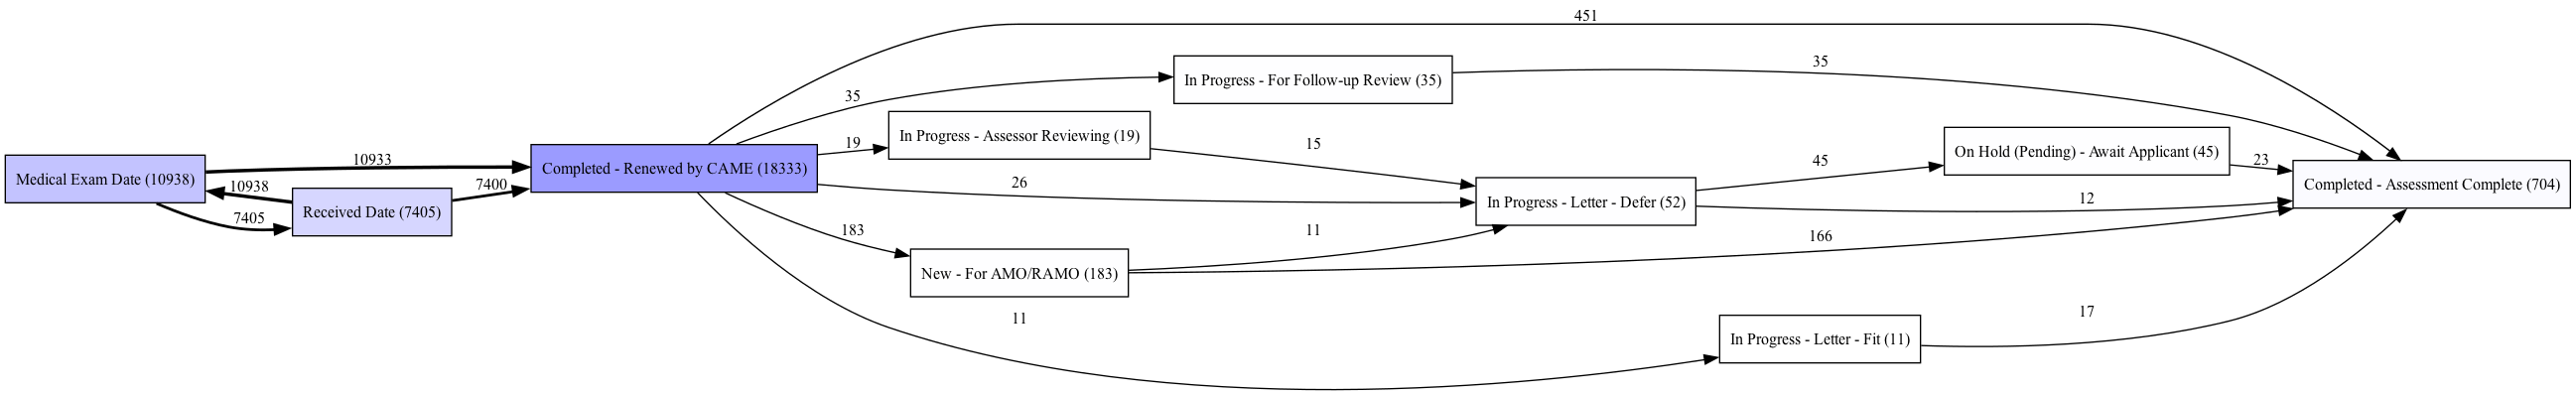

In [6]:
# compare _ Initial Applicants - Reallocation

dfg_New1 = {('Completed - Assessment Complete', 'Completed - Renewed by CAME'): 3, ('Completed - Assessment Complete', 'In Progress - Assessor Reviewing'): 1, ('Completed - Assessment Complete', 'In Progress - Letter - Defer'): 7, ('Completed - Assessment Complete', 'In Progress - Letter - Fit'): 1, ('Completed - Assessment Complete', 'On Hold (Pending) - Await Applicant'): 1, ('Completed - Renewed by CAME', 'Completed - Assessment Complete'): 451, ('Completed - Renewed by CAME', 'In Progress - Assessor Reviewing'): 19, ('Completed - Renewed by CAME', 'In Progress - For Follow-up Review'): 35, ('Completed - Renewed by CAME', 'In Progress - Letter - Defer'): 26, ('Completed - Renewed by CAME', 'In Progress - Letter - Fit'): 11, ('Completed - Renewed by CAME', 'In Progress - Letter - Unfit'): 3, ('Completed - Renewed by CAME', 'New - For AMO/RAMO'): 183, ('Completed - Renewed by CAME', 'On Hold (Pending) - AMRB'): 2, ('Completed - Renewed by CAME', 'On Hold (Pending) - Administrative Issue'): 2, ('Completed - Renewed by CAME', 'On Hold (Pending) - Await Applicant'): 3, ('Completed - Renewed by CAME', 'On Hold (Pending) - File Retrieval'): 1, ('In Progress - Assessor Reviewing', 'Completed - Assessment Complete'): 9, ('In Progress - Assessor Reviewing', 'In Progress - Assessor Reviewing'): 1, ('In Progress - Assessor Reviewing', 'In Progress - For Follow-up Review'): 1, ('In Progress - Assessor Reviewing', 'In Progress - Letter - Defer'): 15, ('In Progress - Assessor Reviewing', 'On Hold (Pending) - AMRB'): 1, ('In Progress - Assessor Reviewing', 'On Hold (Pending) - Administrative Issue'): 1, ('In Progress - Assessor Reviewing', 'On Hold (Pending) - Await Applicant'): 3, ('In Progress - For Follow-up Review', 'Completed - Assessment Complete'): 35, ('In Progress - For Follow-up Review', 'In Progress - Letter - Fit'): 3, ('In Progress - For Follow-up Review', 'In Progress - Letter - Unfit'): 1, ('In Progress - For Follow-up Review', 'On Hold (Pending) - AMRB'): 2, ('In Progress - For Follow-up Review', 'On Hold (Pending) - Administrative Issue'): 1, ('In Progress - For Follow-up Review', 'On Hold (Pending) - Await Applicant'): 1, ('In Progress - Letter - Defer', 'Completed - Assessment Complete'): 12, ('In Progress - Letter - Defer', 'In Progress - Assessor Reviewing'): 3, ('In Progress - Letter - Defer', 'In Progress - Letter - Defer'): 1, ('In Progress - Letter - Defer', 'On Hold (Pending) - Await Applicant'): 45, ('In Progress - Letter - Fit', 'Completed - Assessment Complete'): 17, ('In Progress - Letter - Fit', 'In Progress - Letter - Fit'): 1, ('In Progress - Letter - Unfit', 'Completed - Assessment Complete'): 4, ('In Progress - Letter - Unfit', 'In Progress - Letter - Unfit'): 1, ('Medical Exam Date', 'Completed - Assessment Complete'): 2, ('Medical Exam Date', 'Completed - Renewed by CAME'): 10933, ('Medical Exam Date', 'New - For AMO/RAMO'): 2, ('Medical Exam Date', 'On Hold (Pending) - AMRB'): 1, ('Medical Exam Date', 'Received Date'): 7405, ('New - For AMO/RAMO', 'Completed - Assessment Complete'): 166, ('New - For AMO/RAMO', 'Completed - Renewed by CAME'): 2, ('New - For AMO/RAMO', 'In Progress - Assessor Reviewing'): 6, ('New - For AMO/RAMO', 'In Progress - Letter - Defer'): 11, ('New - For AMO/RAMO', 'In Progress - Letter - Fit'): 2, ('New - For AMO/RAMO', 'On Hold (Pending) - Administrative Issue'): 1, ('New - Triage', 'Completed - Renewed by CAME'): 4, ('On Hold (Pending) - AMRB', 'Completed - Assessment Complete'): 4, ('On Hold (Pending) - AMRB', 'Completed - Renewed by CAME'): 1, ('On Hold (Pending) - AMRB', 'In Progress - For Follow-up Review'): 1, ('On Hold (Pending) - AMRB', 'In Progress - Letter - Fit'): 1, ('On Hold (Pending) - Administrative Issue', 'Completed - Assessment Complete'): 4, ('On Hold (Pending) - Administrative Issue', 'New - For AMO/RAMO'): 1, ('On Hold (Pending) - Await Applicant', 'Completed - Assessment Complete'): 23, ('On Hold (Pending) - Await Applicant', 'In Progress - Assessor Reviewing'): 1, ('On Hold (Pending) - Await Applicant', 'In Progress - For Follow-up Review'): 6, ('On Hold (Pending) - Await Applicant', 'In Progress - Letter - Defer'): 1, ('On Hold (Pending) - Await Applicant', 'New - For AMO/RAMO'): 2, ('On Hold (Pending) - Await Applicant', 'On Hold (Pending) - AMRB'): 1, ('On Hold (Pending) - File Retrieval', 'Completed - Assessment Complete'): 1, ('Received Date', 'Completed - Assessment Complete'): 1, ('Received Date', 'Completed - Renewed by CAME'): 7400, ('Received Date', 'Medical Exam Date'): 10938, ('Received Date', 'New - Triage'): 4}
dfg_New1 = { key:value for key, value in dfg_New1.items() if value >= 10 }

gviz = dfg_visualizer.apply(dfg_New1, variant=dfg_visualizer.Variants.FREQUENCY)
dfg_visualizer.view(gviz)

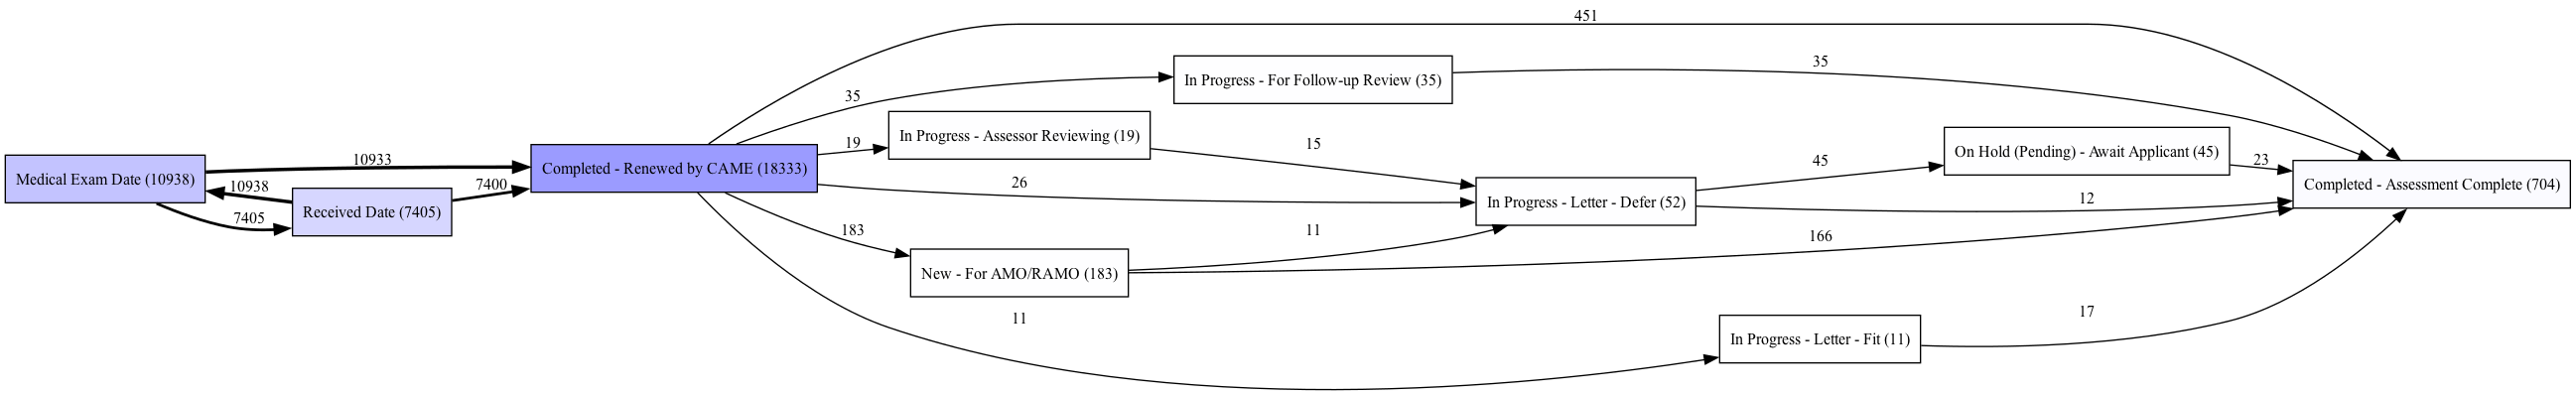

In [7]:
# compare _ Post Pandemic - Period I
# (the same as above :-(

dfg_renewal = {('Completed - Assessment Complete', 'Completed - Renewed by CAME'): 3, ('Completed - Assessment Complete', 'In Progress - Assessor Reviewing'): 1, ('Completed - Assessment Complete', 'In Progress - Letter - Defer'): 7, ('Completed - Assessment Complete', 'In Progress - Letter - Fit'): 1, ('Completed - Assessment Complete', 'On Hold (Pending) - Await Applicant'): 1, ('Completed - Renewed by CAME', 'Completed - Assessment Complete'): 451, ('Completed - Renewed by CAME', 'In Progress - Assessor Reviewing'): 19, ('Completed - Renewed by CAME', 'In Progress - For Follow-up Review'): 35, ('Completed - Renewed by CAME', 'In Progress - Letter - Defer'): 26, ('Completed - Renewed by CAME', 'In Progress - Letter - Fit'): 11, ('Completed - Renewed by CAME', 'In Progress - Letter - Unfit'): 3, ('Completed - Renewed by CAME', 'New - For AMO/RAMO'): 183, ('Completed - Renewed by CAME', 'On Hold (Pending) - AMRB'): 2, ('Completed - Renewed by CAME', 'On Hold (Pending) - Administrative Issue'): 2, ('Completed - Renewed by CAME', 'On Hold (Pending) - Await Applicant'): 3, ('Completed - Renewed by CAME', 'On Hold (Pending) - File Retrieval'): 1, ('In Progress - Assessor Reviewing', 'Completed - Assessment Complete'): 9, ('In Progress - Assessor Reviewing', 'In Progress - Assessor Reviewing'): 1, ('In Progress - Assessor Reviewing', 'In Progress - For Follow-up Review'): 1, ('In Progress - Assessor Reviewing', 'In Progress - Letter - Defer'): 15, ('In Progress - Assessor Reviewing', 'On Hold (Pending) - AMRB'): 1, ('In Progress - Assessor Reviewing', 'On Hold (Pending) - Administrative Issue'): 1, ('In Progress - Assessor Reviewing', 'On Hold (Pending) - Await Applicant'): 3, ('In Progress - For Follow-up Review', 'Completed - Assessment Complete'): 35, ('In Progress - For Follow-up Review', 'In Progress - Letter - Fit'): 3, ('In Progress - For Follow-up Review', 'In Progress - Letter - Unfit'): 1, ('In Progress - For Follow-up Review', 'On Hold (Pending) - AMRB'): 2, ('In Progress - For Follow-up Review', 'On Hold (Pending) - Administrative Issue'): 1, ('In Progress - For Follow-up Review', 'On Hold (Pending) - Await Applicant'): 1, ('In Progress - Letter - Defer', 'Completed - Assessment Complete'): 12, ('In Progress - Letter - Defer', 'In Progress - Assessor Reviewing'): 3, ('In Progress - Letter - Defer', 'In Progress - Letter - Defer'): 1, ('In Progress - Letter - Defer', 'On Hold (Pending) - Await Applicant'): 45, ('In Progress - Letter - Fit', 'Completed - Assessment Complete'): 17, ('In Progress - Letter - Fit', 'In Progress - Letter - Fit'): 1, ('In Progress - Letter - Unfit', 'Completed - Assessment Complete'): 4, ('In Progress - Letter - Unfit', 'In Progress - Letter - Unfit'): 1, ('Medical Exam Date', 'Completed - Assessment Complete'): 2, ('Medical Exam Date', 'Completed - Renewed by CAME'): 10933, ('Medical Exam Date', 'New - For AMO/RAMO'): 2, ('Medical Exam Date', 'On Hold (Pending) - AMRB'): 1, ('Medical Exam Date', 'Received Date'): 7405, ('New - For AMO/RAMO', 'Completed - Assessment Complete'): 166, ('New - For AMO/RAMO', 'Completed - Renewed by CAME'): 2, ('New - For AMO/RAMO', 'In Progress - Assessor Reviewing'): 6, ('New - For AMO/RAMO', 'In Progress - Letter - Defer'): 11, ('New - For AMO/RAMO', 'In Progress - Letter - Fit'): 2, ('New - For AMO/RAMO', 'On Hold (Pending) - Administrative Issue'): 1, ('New - Triage', 'Completed - Renewed by CAME'): 4, ('On Hold (Pending) - AMRB', 'Completed - Assessment Complete'): 4, ('On Hold (Pending) - AMRB', 'Completed - Renewed by CAME'): 1, ('On Hold (Pending) - AMRB', 'In Progress - For Follow-up Review'): 1, ('On Hold (Pending) - AMRB', 'In Progress - Letter - Fit'): 1, ('On Hold (Pending) - Administrative Issue', 'Completed - Assessment Complete'): 4, ('On Hold (Pending) - Administrative Issue', 'New - For AMO/RAMO'): 1, ('On Hold (Pending) - Await Applicant', 'Completed - Assessment Complete'): 23, ('On Hold (Pending) - Await Applicant', 'In Progress - Assessor Reviewing'): 1, ('On Hold (Pending) - Await Applicant', 'In Progress - For Follow-up Review'): 6, ('On Hold (Pending) - Await Applicant', 'In Progress - Letter - Defer'): 1, ('On Hold (Pending) - Await Applicant', 'New - For AMO/RAMO'): 2, ('On Hold (Pending) - Await Applicant', 'On Hold (Pending) - AMRB'): 1, ('On Hold (Pending) - File Retrieval', 'Completed - Assessment Complete'): 1, ('Received Date', 'Completed - Assessment Complete'): 1, ('Received Date', 'Completed - Renewed by CAME'): 7400, ('Received Date', 'Medical Exam Date'): 10938, ('Received Date', 'New - Triage'): 4}
dfg_renewal = { key:value for key, value in dfg_renewal.items() if value >= 10 }

gviz = dfg_visualizer.apply(dfg_renewal, variant=dfg_visualizer.Variants.FREQUENCY)
dfg_visualizer.view(gviz)